# Diamond Dataset Analysis

This project attempts to understand various trends present in the `Diamonds Dataset` and also tries to make an attempt to make a Linear Regression Model which tries to predict the price of any diamond based on its attributes like `carat`, `cut`, `color`, `clarity`, etc.

For this project, we shall be using the pre-existing dataset already present in the `Seaborn` library which provides us with a datset for prices and all other attributes of **53,840 diamonds** in total. Some sampling may also be performed in order to derive insights from the entire dataset and to understand various trends exhibited by the data. This is because performing operations on 53,840 tuples of data may increase the noise and the duration of execution of the programs as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds = sns.load_dataset("diamonds")

In [3]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
diamonds[diamonds.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


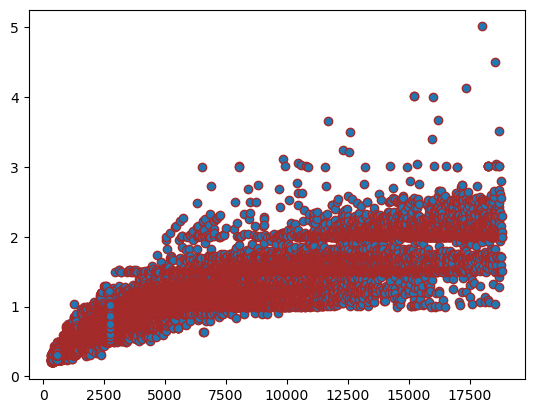

In [7]:
plt.scatter(diamonds['price'], diamonds['carat'], edgecolor='brown')

Trying to take samples from the dataset:

In [8]:
new_diamonds = diamonds.sample(frac=0.25)
new_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
12982,1.11,Premium,H,VS2,62.0,59.0,5395,6.66,6.59,4.11
18020,1.13,Ideal,G,VS2,61.6,57.0,7290,6.70,6.68,4.12
12729,1.03,Very Good,D,SI1,60.5,61.0,5313,6.43,6.47,3.90
30888,0.33,Premium,E,SI1,60.6,60.0,743,4.44,4.41,2.68
16650,1.02,Very Good,F,VS2,63.2,57.0,6659,6.34,6.41,4.03
...,...,...,...,...,...,...,...,...,...,...
7605,0.73,Ideal,D,VS1,61.9,55.0,4258,5.78,5.81,3.59
48857,0.50,Ideal,D,VS1,62.2,54.4,2033,5.07,5.11,3.16
7188,0.90,Good,I,VVS1,63.6,58.0,4187,6.10,6.14,3.89
49355,0.71,Very Good,F,SI2,63.6,56.0,2098,5.58,5.67,3.58


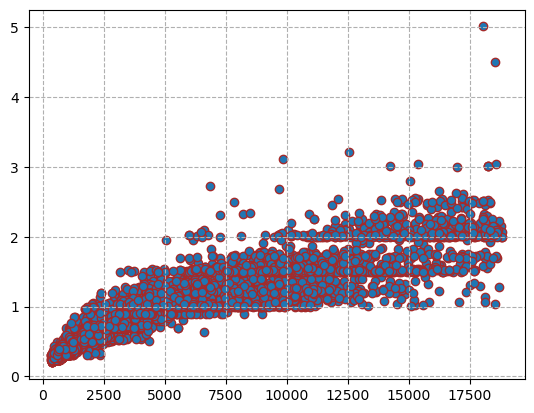

In [9]:
plt.scatter(new_diamonds['price'], new_diamonds['carat'], edgecolor='brown')
plt.grid(linestyle="--")

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


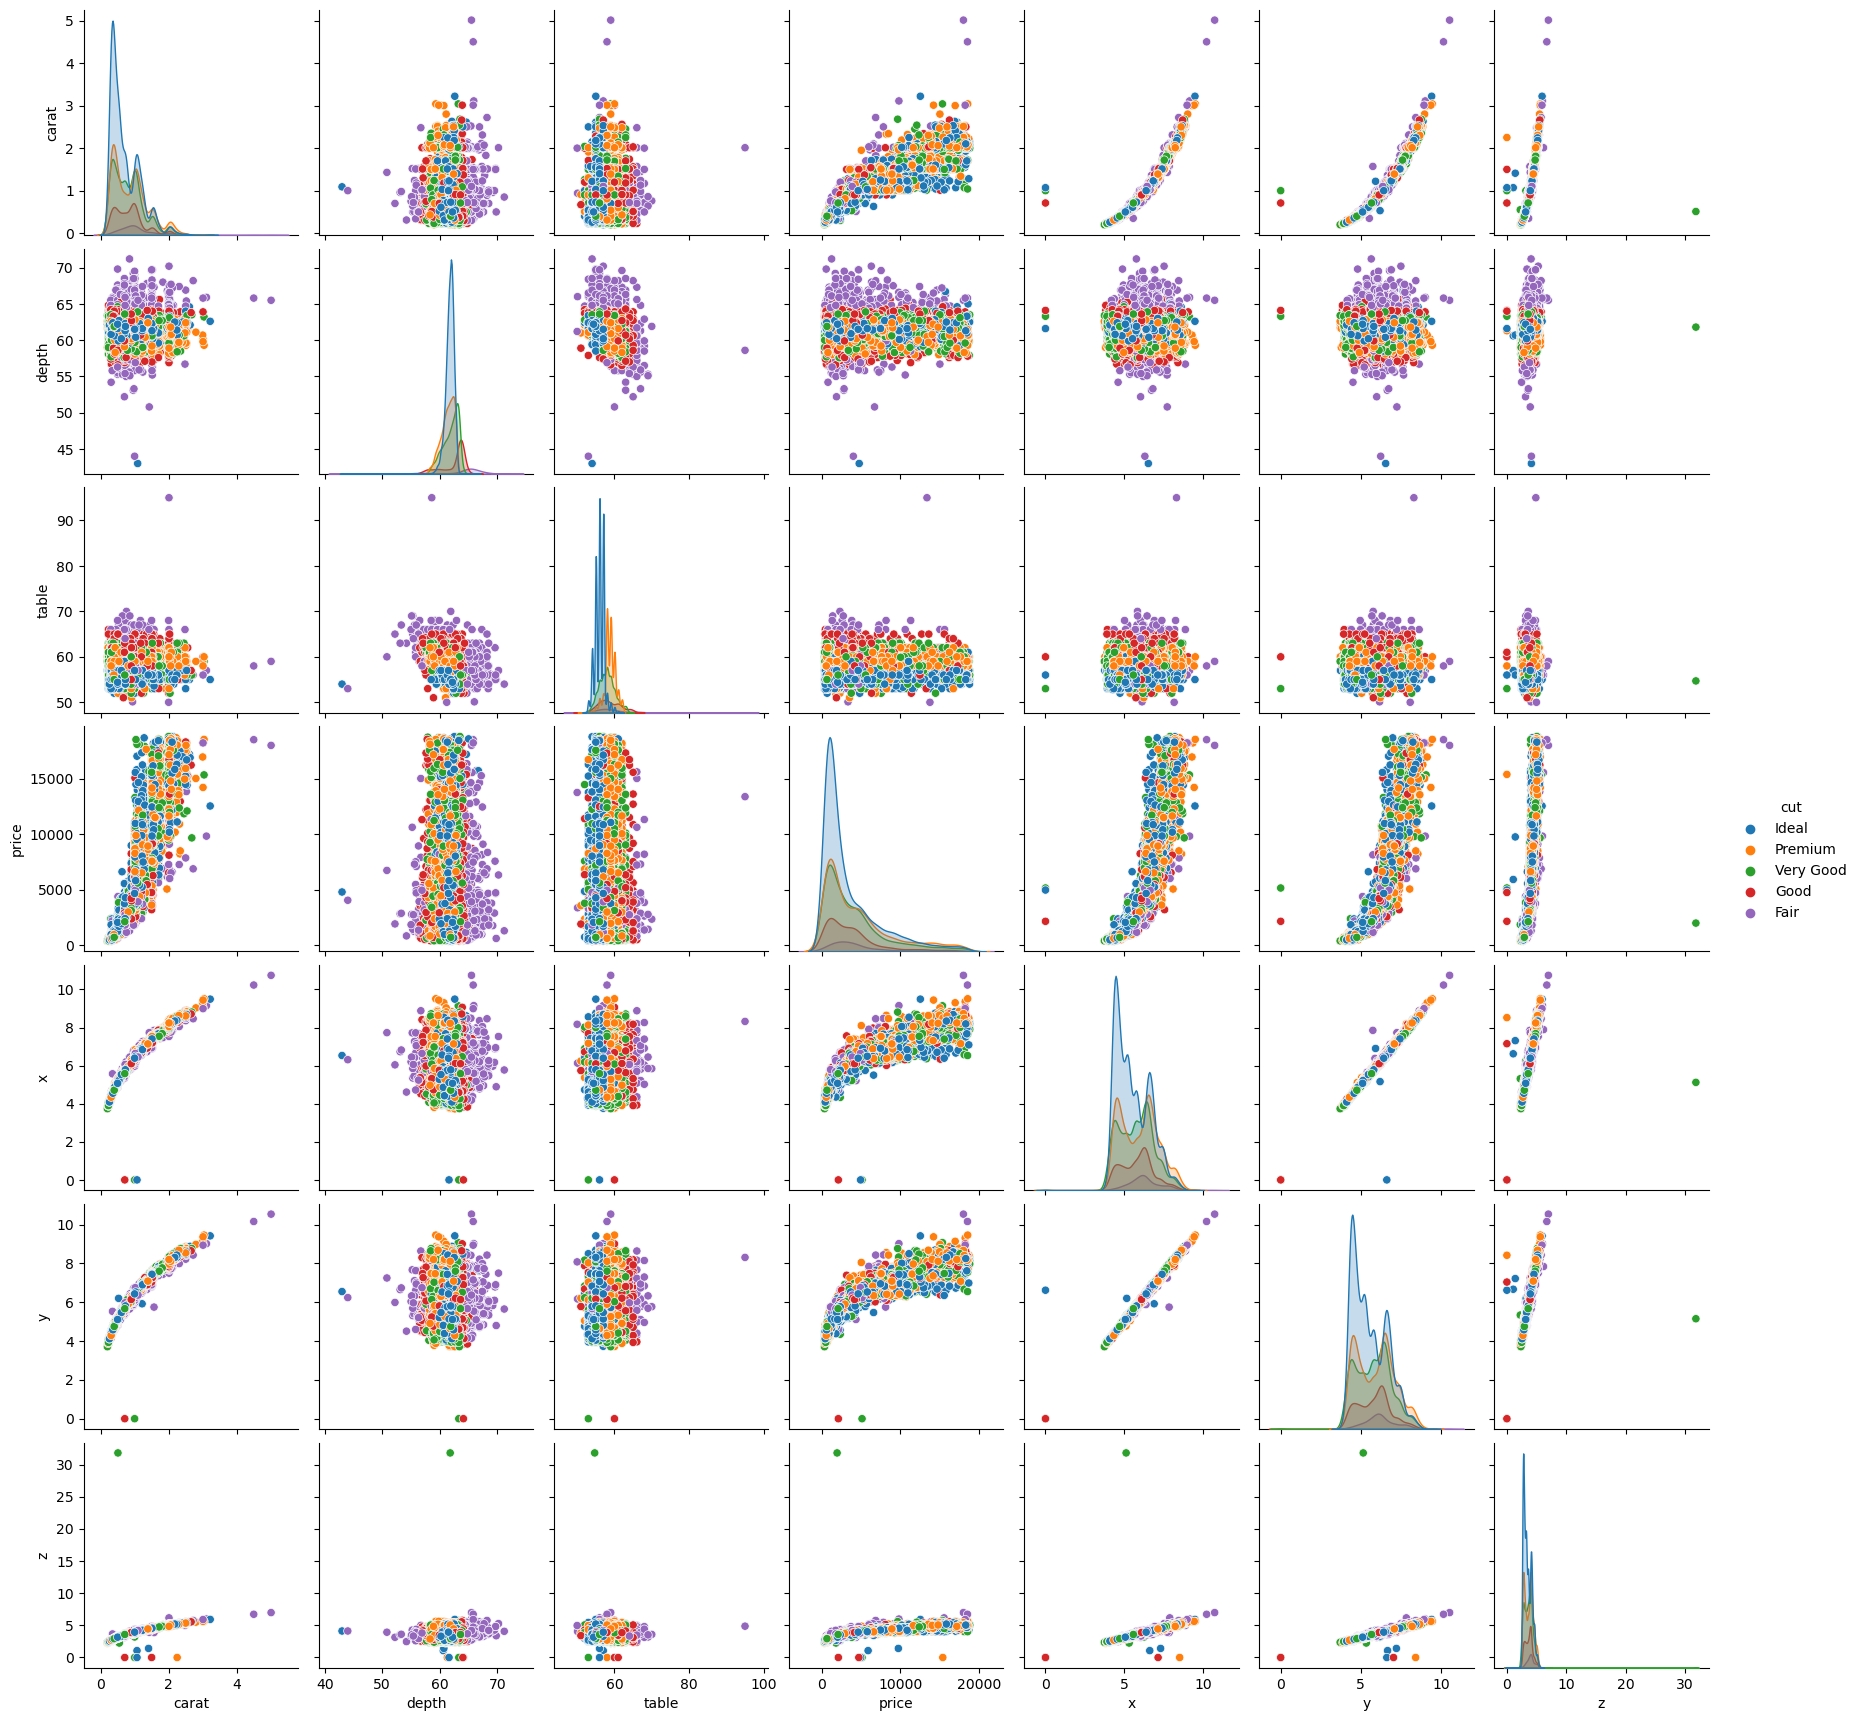

In [10]:
sns.pairplot(new_diamonds, hue = 'cut')
plt.savefig("pair_plot.jpg")

In this given dataset, if we consider 'price' to be the dependent variable, and other values as the independent variable, then we do have a linear graph with respect to all the other attributes available to us. 

Here, from the given dataset:
    
    Categorical Variables : {'cut','clarity', 'color'}
    Numerical Variables : {'carat', 'depth', 'table', 'price', 'x', 'y', 'z'}

In [11]:
list1 = list(new_diamonds.columns)
list1

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [12]:
categorical = ['cut', 'clarity', 'color']
numerical = list(set(list1)-set(categorical))
numerical

['y', 'x', 'price', 'carat', 'z', 'table', 'depth']

In [13]:
new_diamonds.groupby('carat')[['carat']].count()

,carat
carat,
0.20,5
0.21,1
0.22,1
0.23,63
0.24,53
...,...
3.04,2
3.11,1
3.22,1


In [14]:
x = pd.DataFrame(new_diamonds.groupby('carat')[['price']].mean())
print(x)
print('Mean price = ',x[['price']].mean())
print('Median price = ',x[['price']].median())
print('Max price = ',x[['price']].max())
print('Min price = ',x[['price']].min())
print("Total Types of Carats of Diamonds available : ", x['price'].count())

              price
carat              
0.20     367.000000
0.21     386.000000
0.22     404.000000
0.23     489.968254
0.24     495.886792
...             ...
3.04   16956.500000
3.11    9823.000000
3.22   12545.000000
4.50   18531.000000
5.01   18018.000000

[240 rows x 1 columns]
Mean price =  price    8539.624379
dtype: float64
Median price =  price    8148.178571
dtype: float64
Max price =  price    18706.0
dtype: float64
Min price =  price    367.0
dtype: float64
Total Types of Carats of Diamonds available :  240


In [15]:
unique_carat = list(x.index)
print(unique_carat)

[0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.87, 1.89, 1.91, 1.92, 1.

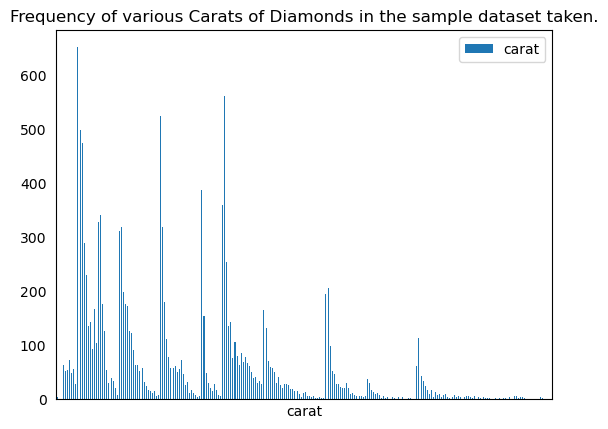

In [46]:
new_diamonds.groupby('carat')[['carat']].count().plot(kind='bar')
plt.title("Frequency of various Carats of Diamonds in the sample dataset taken.")
plt.tick_params(left = False, right = False , labelleft = True , 
                labelbottom = False, bottom = False)
plt.show()

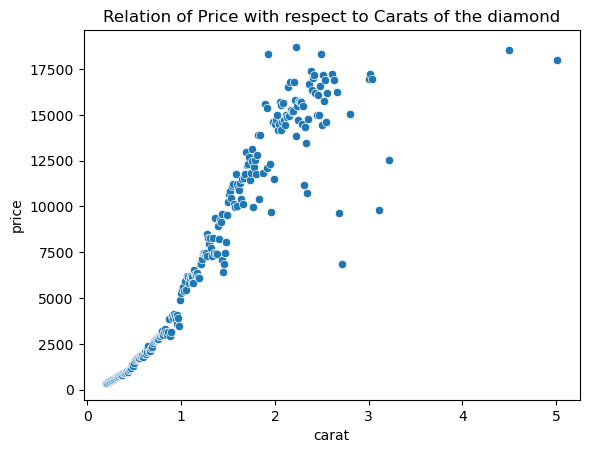

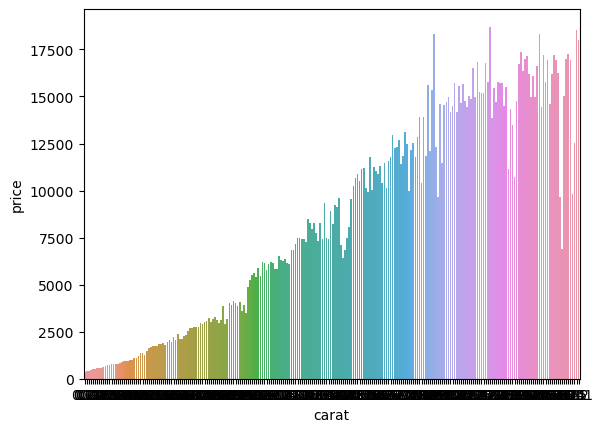

In [17]:
sns.scatterplot(data=x, x=x.index, y=x['price'])
plt.title("Relation of Price with respect to Carats of the diamond")
plt.show()
sns.barplot(data=x, x=x.index, y=x['price'])
plt.savefig("Carats VS Price.jpg")
plt.show()

To find trends with respect to each type of `Cut` existing in the given dataset:

In [18]:
y = new_diamonds.groupby('cut')[["cut", 'price']].agg({
    "cut":"count",
    "price":"mean"
})
new_names = {'cut': 'Grouped Cut count', 'price':'Median of Group of Prices'}

y.rename(columns=new_names)

,Grouped Cut count,Median of Group of Prices
cut,,
Ideal,5322,3532.422022
Premium,3438,4599.211169
Very Good,3064,4017.477807
Good,1261,3792.888977
Fair,400,4509.852500


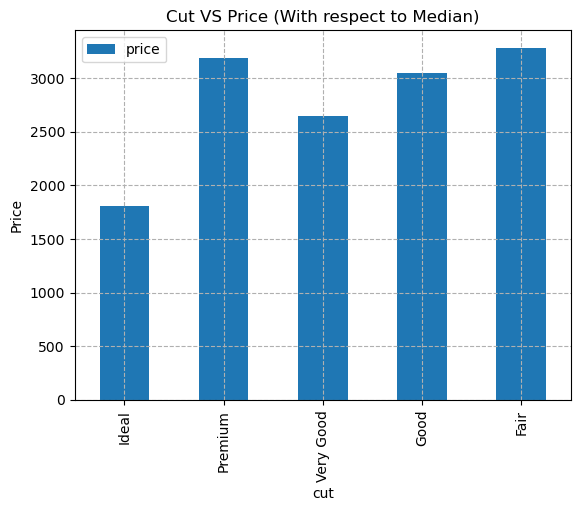

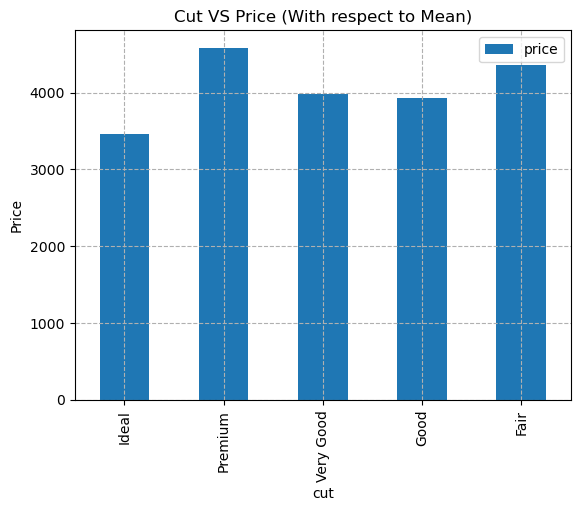

In [19]:
diamonds.groupby('cut')[['price']].median().plot(kind="bar")
plt.grid(linestyle="--")
plt.ylabel("Price")
plt.title("Cut VS Price (With respect to Median)")
plt.show()
diamonds.groupby('cut')[['price']].mean().plot(kind="bar")
plt.grid(linestyle="--")
plt.ylabel("Price")
plt.title("Cut VS Price (With respect to Mean)")
plt.show()

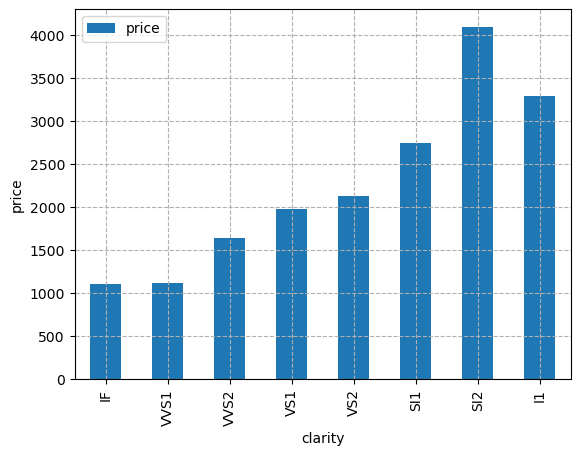

In [20]:
new_diamonds.groupby("clarity")[["price"]].median().plot(kind="bar")
plt.ylabel("price")
plt.grid(linestyle='--')
plt.show()

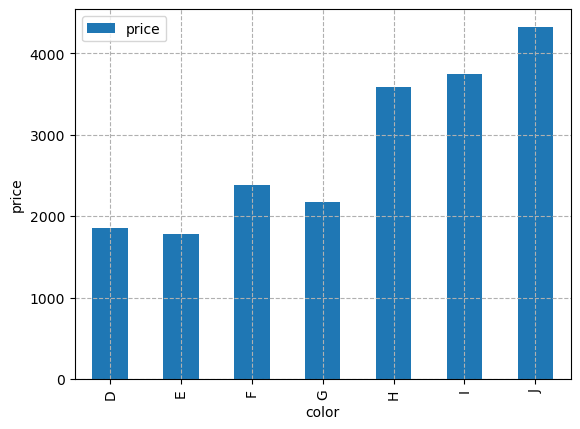

In [21]:
new_diamonds.groupby("color")[["price"]].median().plot(kind="bar")
plt.ylabel("price")
plt.grid(linestyle='--')
plt.show()

In [22]:
y = new_diamonds['price']
y

12982    5395
18020    7290
12729    5313
30888     743
16650    6659
         ... 
7605     4258
48857    2033
7188     4187
49355    2098
9682     4649
Name: price, Length: 13485, dtype: int64

In [23]:
new_diamonds = new_diamonds.drop('price', axis=1)
new_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
12982,1.11,Premium,H,VS2,62.0,59.0,6.66,6.59,4.11
18020,1.13,Ideal,G,VS2,61.6,57.0,6.70,6.68,4.12
12729,1.03,Very Good,D,SI1,60.5,61.0,6.43,6.47,3.90
30888,0.33,Premium,E,SI1,60.6,60.0,4.44,4.41,2.68
16650,1.02,Very Good,F,VS2,63.2,57.0,6.34,6.41,4.03
...,...,...,...,...,...,...,...,...,...
7605,0.73,Ideal,D,VS1,61.9,55.0,5.78,5.81,3.59
48857,0.50,Ideal,D,VS1,62.2,54.4,5.07,5.11,3.16
7188,0.90,Good,I,VVS1,63.6,58.0,6.10,6.14,3.89
49355,0.71,Very Good,F,SI2,63.6,56.0,5.58,5.67,3.58


In [24]:
new_diamonds.insert(9,'price',y,True)
new_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price
12982,1.11,Premium,H,VS2,62.0,59.0,6.66,6.59,4.11,5395
18020,1.13,Ideal,G,VS2,61.6,57.0,6.70,6.68,4.12,7290
12729,1.03,Very Good,D,SI1,60.5,61.0,6.43,6.47,3.90,5313
30888,0.33,Premium,E,SI1,60.6,60.0,4.44,4.41,2.68,743
16650,1.02,Very Good,F,VS2,63.2,57.0,6.34,6.41,4.03,6659
...,...,...,...,...,...,...,...,...,...,...
7605,0.73,Ideal,D,VS1,61.9,55.0,5.78,5.81,3.59,4258
48857,0.50,Ideal,D,VS1,62.2,54.4,5.07,5.11,3.16,2033
7188,0.90,Good,I,VVS1,63.6,58.0,6.10,6.14,3.89,4187
49355,0.71,Very Good,F,SI2,63.6,56.0,5.58,5.67,3.58,2098


In [25]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(np.asarray(new_diamonds['cut']).reshape(-1,1))
new_diamonds['cut'] = encoder.transform(np.asarray(new_diamonds['cut']).reshape(-1,1))

In [26]:
encoder_clarity = OrdinalEncoder()
encoder_clarity.fit(np.asarray(new_diamonds['clarity']).reshape(-1,1))
new_diamonds['clarity'] = encoder_clarity.transform(np.asarray(new_diamonds['clarity']).reshape(-1,1))

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_diamonds['color']=encoder.fit_transform(new_diamonds['color'])
new_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price
12982,1.11,3.0,4,5.0,62.0,59.0,6.66,6.59,4.11,5395
18020,1.13,2.0,3,5.0,61.6,57.0,6.70,6.68,4.12,7290
12729,1.03,4.0,0,2.0,60.5,61.0,6.43,6.47,3.90,5313
30888,0.33,3.0,1,2.0,60.6,60.0,4.44,4.41,2.68,743
16650,1.02,4.0,2,5.0,63.2,57.0,6.34,6.41,4.03,6659
...,...,...,...,...,...,...,...,...,...,...
7605,0.73,2.0,0,4.0,61.9,55.0,5.78,5.81,3.59,4258
48857,0.50,2.0,0,4.0,62.2,54.4,5.07,5.11,3.16,2033
7188,0.90,1.0,5,6.0,63.6,58.0,6.10,6.14,3.89,4187
49355,0.71,4.0,2,3.0,63.6,56.0,5.58,5.67,3.58,2098


In [28]:
X = new_diamonds.iloc[:,0:9]
Y = new_diamonds.iloc[:,-1]
X

,carat,cut,color,clarity,depth,table,x,y,z
12982,1.11,3.0,4,5.0,62.0,59.0,6.66,6.59,4.11
18020,1.13,2.0,3,5.0,61.6,57.0,6.70,6.68,4.12
12729,1.03,4.0,0,2.0,60.5,61.0,6.43,6.47,3.90
30888,0.33,3.0,1,2.0,60.6,60.0,4.44,4.41,2.68
16650,1.02,4.0,2,5.0,63.2,57.0,6.34,6.41,4.03
...,...,...,...,...,...,...,...,...,...
7605,0.73,2.0,0,4.0,61.9,55.0,5.78,5.81,3.59
48857,0.50,2.0,0,4.0,62.2,54.4,5.07,5.11,3.16
7188,0.90,1.0,5,6.0,63.6,58.0,6.10,6.14,3.89
49355,0.71,4.0,2,3.0,63.6,56.0,5.58,5.67,3.58


In [29]:
Y

12982    5395
18020    7290
12729    5313
30888     743
16650    6659
         ... 
7605     4258
48857    2033
7188     4187
49355    2098
9682     4649
Name: price, Length: 13485, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=57)
print("X_train.shape = ", X_train.shape)
print("Y_train.shape = ", Y_train.shape)
print("X_test.shape = ", X_test.shape)
print("Y_test.shape = ", Y_test.shape)

X_train.shape =  (10788, 9)
Y_train.shape =  (10788,)
X_test.shape =  (2697, 9)
Y_test.shape =  (2697,)


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fit = sc.fit_transform(X_train)
X_test_fit = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_fit, Y_train)

LinearRegression()

In [33]:
predictions = regressor.predict(X_test_fit)
predictions

array([9952.25159823,  477.93041881, 6948.65246637, ...,   25.64173162,
       -445.26078063, 3858.46884343])

In [34]:
print("Accuracy on the training data = ",regressor.score(X_train_fit, Y_train))
print("Accuracy on the testing data = ",regressor.score(X_test_fit, Y_test))

Accuracy on the training data =  0.8877863239228134
Accuracy on the testing data =  0.8446948516514352


### The accuracy we have obtained in the sampled model is around 88-89%. Now, we are attempting to create another model wherein the entire 'Diamonds' Dataset is used and all 53,940 values are put to use to train and test the new Model.

#### Performing Encoding using LabelEncoder and OrdinalEncoder:

In [35]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(np.asarray(diamonds['cut']).reshape(-1,1))
diamonds['cut'] = encoder.transform(np.asarray(diamonds['cut']).reshape(-1,1))

# from sklearn.preprocessing import LabelEncoder
encoder_clarity = LabelEncoder()
diamonds['clarity']=encoder_clarity.fit_transform(diamonds['clarity'])

# encoder_clarity = OrdinalEncoder()
# encoder_clarity.fit(np.asarray(diamonds['clarity']).reshape(-1,1))
# diamonds['clarity'] = encoder_clarity.transform(np.asarray(diamonds['clarity']).reshape(-1,1))

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# diamonds['color']=encoder.fit_transform(diamonds['color'])
# diamonds

encoder_color = OrdinalEncoder()
encoder_color.fit(np.asarray(diamonds['color']).reshape(-1,1))
diamonds['color'] = encoder_color.transform(np.asarray(diamonds['color']).reshape(-1,1))
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1.0,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5.0,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1.0,0.0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4.0,0.0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3.0,4.0,3,61.0,58.0,2757,6.15,6.12,3.74


#### Reshaping the entire table to seperate the independent variables 'X' and the dependent variables 'Y':

In [37]:
y = diamonds['price']
diamonds = diamonds.drop('price', axis=1)
diamonds.insert(9,'price',y,True)
diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2.0,1.0,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3.0,1.0,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1.0,1.0,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3.0,5.0,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1.0,6.0,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1.0,0.0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4.0,0.0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3.0,4.0,3,61.0,58.0,6.15,6.12,3.74,2757


In [38]:
X = diamonds.iloc[:,0:9]
Y = diamonds.iloc[:,-1]
X.head(5)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2.0,1.0,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,1.0,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,1.0,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,5.0,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,6.0,3,63.3,58.0,4.34,4.35,2.75


In [39]:
Y.shape

(53940,)

#### Spliting the Independent and Dependent Variables into Training and Testing data & performing Standard Scaling operations i.e. Normalization w.r.t columns:

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)
print("X_train.shape = ", X_train.shape)
print("Y_train.shape = ", Y_train.shape)
print("X_test.shape = ", X_test.shape)
print("Y_test.shape = ", Y_test.shape)

X_train.shape =  (37758, 9)
Y_train.shape =  (37758,)
X_test.shape =  (16182, 9)
Y_test.shape =  (16182,)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fit = sc.fit_transform(X_train)
X_test_fit = sc.transform(X_test)

#### Creation & training of the Model and Checking of accuracy score on the training and testing data:

In [42]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train_fit, Y_train)

LinearRegression()

In [43]:
predictions = regressor1.predict(X_test_fit)
predictions

array([  737.67735333,   905.76746573, 10733.52664698, ...,
        5785.34901884,   938.90172826,  7040.33120009])

In [44]:
print("Accuracy on the training data = ",regressor1.score(X_train_fit, Y_train))
print("Accuracy on the testing data = ",regressor1.score(X_test_fit, Y_test))

Accuracy on the training data =  0.8840114198094176
Accuracy on the testing data =  0.8874077946790888


Hence, we can conclude that we have performed the Exploratory Data Analysis (EDA) upon the `Diamonds Dataset` and tried to find some of the important features and relationships between various schemas/columns present in the dataset. According to the analysis, the dataset consisted of Linear Relationships between the columns consisting of numerical data, as depicted in the pairplot printed above. However, for Categorical Data, pairplots cannot illustrate relations among them.

To solve this problem, we manually tried to plot out relations between the Categorical Columns and the `Price` column in the dataset to check if those columns affected the 'Y' values in our dataset. There were 3 Categorical Columns, namely: 'Cut', 'Color', and 'Clarity'. 'Cut' and 'Color' show some ordinal trend since these factors directly affect the price of the diamonds. Hence, an **Ordinal Encoder** is used here to encode the possible classes present in the respective columns.

**StandardScaler** is used to perform **Normalization** throughout the table once the Encoding operation is performed. It attempts to scale up or down the features to a common scale which in-turn leads to improvement in training of the model and provides us with better accuracies.

During splitting of the data into training and testing data, we are trying to keep 70% of data for training and 30% of data for testing purposes. The `random_state` value is taken to be 42 in this case. The `random_state` feature defines the number of values from which sampling can be performed or samples can be collected for segregation between training and testing datasets with the provided dataset sizes.

In the model trained, we have achieved the following accuracies:

**Training Accuracy: 88.4011%**

**Testing Accuracy: 88.7407%**

No signs of Overfitting have been found yet since the testing accuracy is slightly better than training accuracy.